In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns

In [3]:
df = pd.read_csv('inflation_rate2020_2023.csv',parse_dates=True)

In [4]:
df.head(5)

,country,market,admin_1,longitude,latitude,cpcv2,product,source_document,period_date,price_type,product_source,unit,unit_type,currency,value
0,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,R01701BD,Beans (Haricot),Famine Early Warning Systems Network (FEWS NET...,1/1/2020,Retail,Local,kg,Weight,ETB,41.00
1,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,S8AA,"Casual Labor (unskilled, daily, without food)",Famine Early Warning Systems Network (FEWS NET...,1/1/2020,Wage,Local,day,Item,ETB,54.00
2,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,P33360AA,Diesel,Famine Early Warning Systems Network (FEWS NET...,1/1/2020,Retail,Import,L,Volume,ETB,18.75
3,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,P03130AA,Firewood,Famine Early Warning Systems Network (FEWS NET...,1/1/2020,Retail,Local,kg,Weight,ETB,5.52
4,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,P33310AA,Gasoline,Famine Early Warning Systems Network (FEWS NET...,1/1/2020,Retail,Import,L,Volume,ETB,18.75


In [6]:
df.shape

(59948, 15)

In [7]:
df.dtypes

country             object
market              object
admin_1             object
longitude          float64
latitude           float64
cpcv2               object
product             object
source_document     object
period_date         object
price_type          object
product_source      object
unit                object
unit_type           object
currency            object
value              float64
dtype: object

In [5]:
df = df.set_index('period_date')
df.head(5)

,country,market,admin_1,longitude,latitude,cpcv2,product,source_document,price_type,product_source,unit,unit_type,currency,value
period_date,,,,,,,,,,,,,,
1/1/2020,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,R01701BD,Beans (Haricot),Famine Early Warning Systems Network (FEWS NET...,Retail,Local,kg,Weight,ETB,41.00
1/1/2020,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,S8AA,"Casual Labor (unskilled, daily, without food)",Famine Early Warning Systems Network (FEWS NET...,Wage,Local,day,Item,ETB,54.00
1/1/2020,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,P33360AA,Diesel,Famine Early Warning Systems Network (FEWS NET...,Retail,Import,L,Volume,ETB,18.75
1/1/2020,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,P03130AA,Firewood,Famine Early Warning Systems Network (FEWS NET...,Retail,Local,kg,Weight,ETB,5.52
1/1/2020,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,P33310AA,Gasoline,Famine Early Warning Systems Network (FEWS NET...,Retail,Import,L,Volume,ETB,18.75


In [6]:
df.index = pd.to_datetime(df.index)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.day_name()

In [12]:
df.sample(5, random_state=0)

,country,market,admin_1,longitude,latitude,cpcv2,product,source_document,price_type,product_source,unit,unit_type,currency,value,Year,Month,Weekday Name
period_date,,,,,,,,,,,,,,,,,
2022-02-16,Ethiopia,Yabelo,Oromia,38.093399,4.89343,P03130AA,Firewood,Famine Early Warning Systems Network (FEWS NET...,Retail,Local,kg,Weight,ETB,1.650000,2022,2,Wednesday
2022-03-02,Ethiopia,Jinka,SNNPR,36.335201,5.47210,P03130AA,Firewood,Famine Early Warning Systems Network (FEWS NET...,Retail,Local,kg,Weight,ETB,2.880000,2022,3,Wednesday
2021-08-25,Ethiopia,Gode,Somali,43.557400,5.95278,R01112AA,Wheat Grain,Famine Early Warning Systems Network (FEWS NET...,Retail,Local,kg,Weight,ETB,37.799999,2021,8,Wednesday
2021-04-14,Ethiopia,Jinka,SNNPR,36.335201,5.47210,L02122AP,Sheep (Local Quality),Famine Early Warning Systems Network (FEWS NET...,Retail,Local,ea,Item,ETB,1850.000000,2021,4,Wednesday
2020-04-01,Ethiopia,Warder,Somali,45.341801,6.97346,P23110AA,Wheat Flour,Famine Early Warning Systems Network (FEWS NET...,Retail,Local,kg,Weight,ETB,31.000000,2020,4,Wednesday


In [14]:
#data loc for month
df.loc['14/04/2021']

,country,market,admin_1,longitude,latitude,cpcv2,product,source_document,price_type,product_source,unit,unit_type,currency,value,Year,Month,Weekday Name
period_date,,,,,,,,,,,,,,,,,
2021-04-14,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,R01701BD,Beans (Haricot),Famine Early Warning Systems Network (FEWS NET...,Retail,Local,kg,Weight,ETB,59.000000,2021,4,Wednesday
2021-04-14,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,S8AA,"Casual Labor (unskilled, daily, without food)",Famine Early Warning Systems Network (FEWS NET...,Wage,Local,day,Item,ETB,165.000000,2021,4,Wednesday
2021-04-14,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,P33360AA,Diesel,Famine Early Warning Systems Network (FEWS NET...,Retail,Import,L,Volume,ETB,23.180000,2021,4,Wednesday
2021-04-14,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,P03130AA,Firewood,Famine Early Warning Systems Network (FEWS NET...,Retail,Local,kg,Weight,ETB,3.520000,2021,4,Wednesday
2021-04-14,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,P33310AA,Gasoline,Famine Early Warning Systems Network (FEWS NET...,Retail,Import,L,Volume,ETB,25.860001,2021,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-14,Ethiopia,Yabelo,Oromia,38.093399,4.89343,L02122AP,Sheep (Local Quality),Famine Early Warning Systems Network (FEWS NET...,Retail,Local,ea,Item,ETB,1340.000000,2021,4,Wednesday
2021-04-14,Ethiopia,Yabelo,Oromia,38.093399,4.89343,R01142AC,Sorghum (Red),Famine Early Warning Systems Network (FEWS NET...,Retail,Local,kg,Weight,ETB,18.827999,2021,4,Wednesday
2021-04-14,Ethiopia,Yabelo,Oromia,38.093399,4.89343,R01142AD,Sorghum (White),Famine Early Warning Systems Network (FEWS NET...,Retail,Local,kg,Weight,ETB,21.562000,2021,4,Wednesday


In [10]:
# use seaborn style default and set the default figure size 
sns.set(rc={'figure.figsize':(11, 4)})

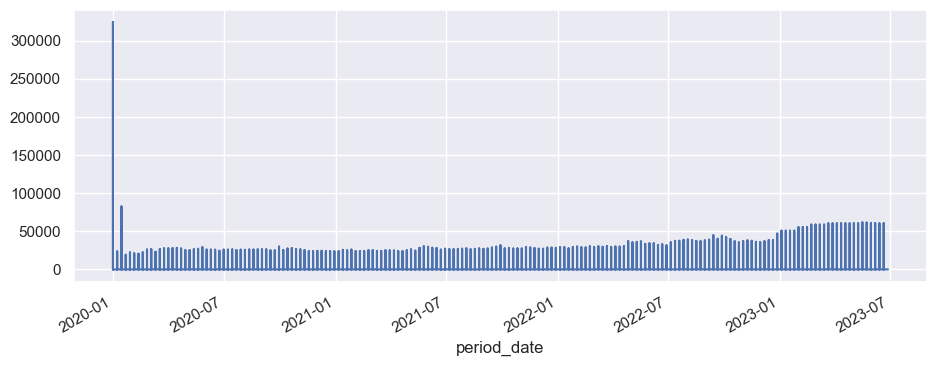

In [16]:
df['value'].plot();

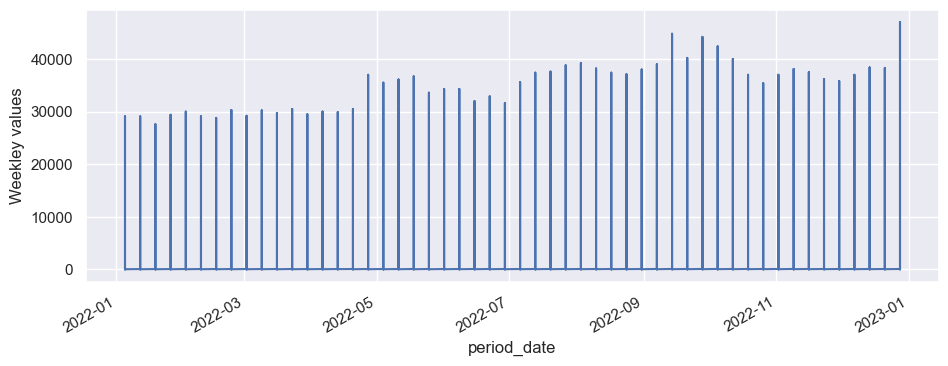

In [17]:
ax = df.loc['2022', 'value'].plot()
ax.set_ylabel('Weekley values');

In [7]:
#let's resample the data to a weekly mean time series.
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['value']
# Resample to weekly frequency, aggregating with mean
data_mean_weekly = df[data_columns].resample('W').mean()
data_mean_weekly.head(3)

,value
period_date,
2020-01-05,2372.656517
2020-01-12,1400.225787
2020-01-19,1522.737656


In [8]:
data_monthly_mean = df[data_columns].resample('M').mean()
data_monthly_mean.head(3)

,value
period_date,
2020-01-31,1593.969684
2020-02-29,1434.266459
2020-03-31,1391.135413


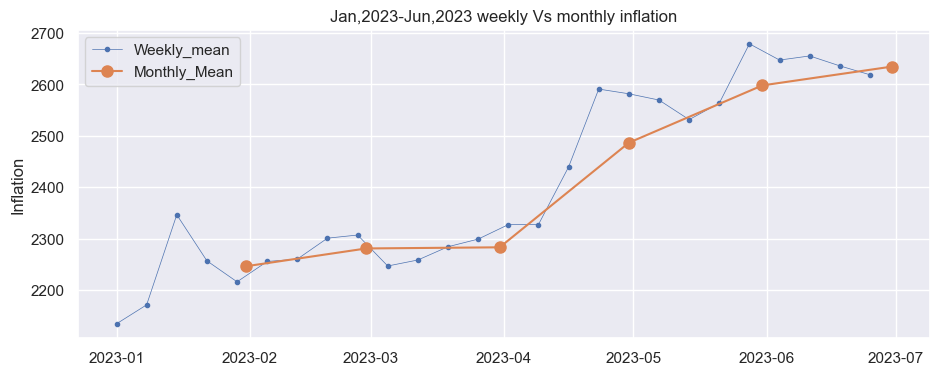

In [22]:
# Start and end of the date range to extract
start, end = '2023-01', '2023-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data_mean_weekly.loc[start:end, 'value'],marker='.', linestyle='-', 
        linewidth=0.5, label='Weekly_mean')
ax.plot(data_monthly_mean.loc[start:end, 'value'], marker='o', 
        markersize=8, linestyle='-', label='Monthly_Mean')
ax.set_ylabel('Inflation')
ax.set_title('Jan,2023-Jun,2023 weekly Vs monthly inflation')
ax.legend();

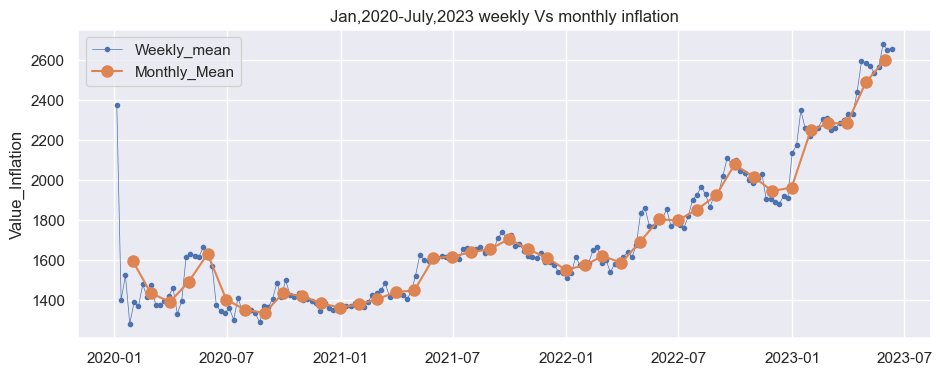

In [11]:
# Start and end of the date range to extract
start, end = '2020-01', '2023-06-15'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data_mean_weekly.loc[start:end, 'value'],marker='.', linestyle='-', 
        linewidth=0.5, label='Weekly_mean')
ax.plot(data_monthly_mean.loc[start:end, 'value'], marker='o', 
        markersize=8, linestyle='-', label='Monthly_Mean')
ax.set_ylabel('Value_Inflation')
ax.set_title('Jan,2020-July,2023 weekly Vs monthly inflation')
ax.legend();

In [25]:
#let see weekly repot between 2023-01 upto 2023-02 
pd.date_range('2023-01', '2023-02', freq='W')

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='W-SUN')

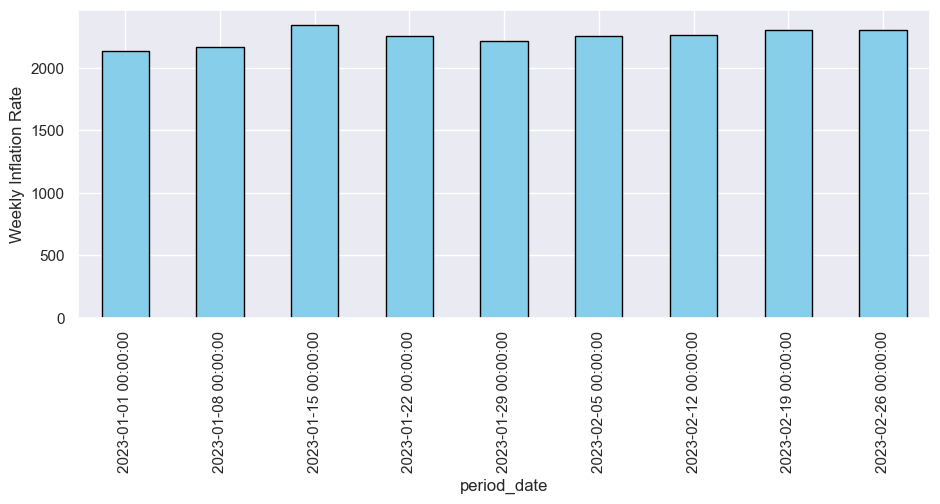

In [28]:
ax = data_mean_weekly.loc['2023-01':'2023-02', 'value'].plot(kind='bar',color= 'skyblue',edgecolor='black')
ax.set_ylabel('Weekly Inflation Rate');

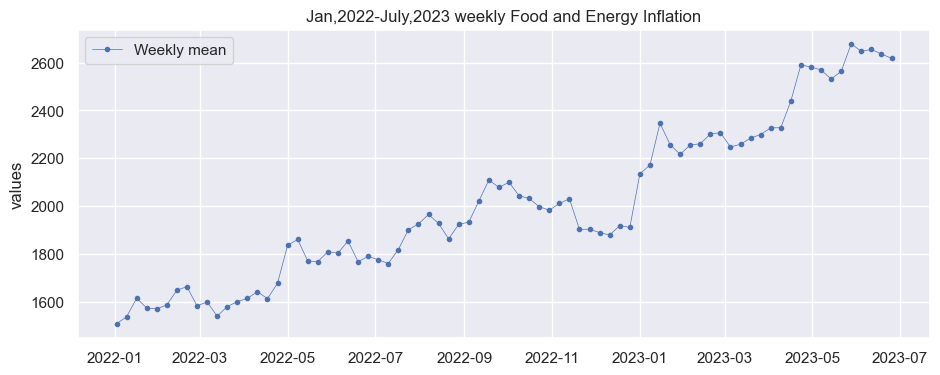

In [13]:
# Start and end of the date range to extract
start, end = '2022-01', '2023-06-25'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data_mean_weekly.loc[start:end, 'value'],marker='.', linestyle='-', 
        linewidth=0.5, label='Weekly mean')
ax.set_ylabel('values')
ax.set_title('Jan,2022-July,2023 weekly Food and Energy Inflation')
ax.legend();

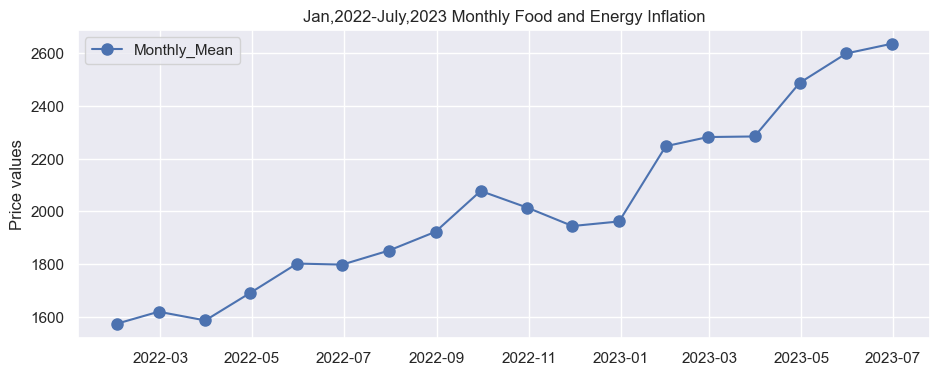

In [14]:
# Start and end of the date range to extract
start, end = '2022-01', '2023-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data_monthly_mean.loc[start:end, 'value'], marker='o', 
        markersize=8, linestyle='-', label='Monthly_Mean')
ax.set_ylabel('Price values')
ax.set_title('Jan,2022-July,2023 Monthly Food and Energy Inflation')
ax.legend();

In [15]:
# Yearly frequency, aggregating with mean
data_annual_mean = df[data_columns].resample('A').mean()
data_annual_mean.head()

,value
period_date,
2020-12-31,1431.383668
2021-12-31,1557.137685
2022-12-31,1821.946903
2023-12-31,2420.617922


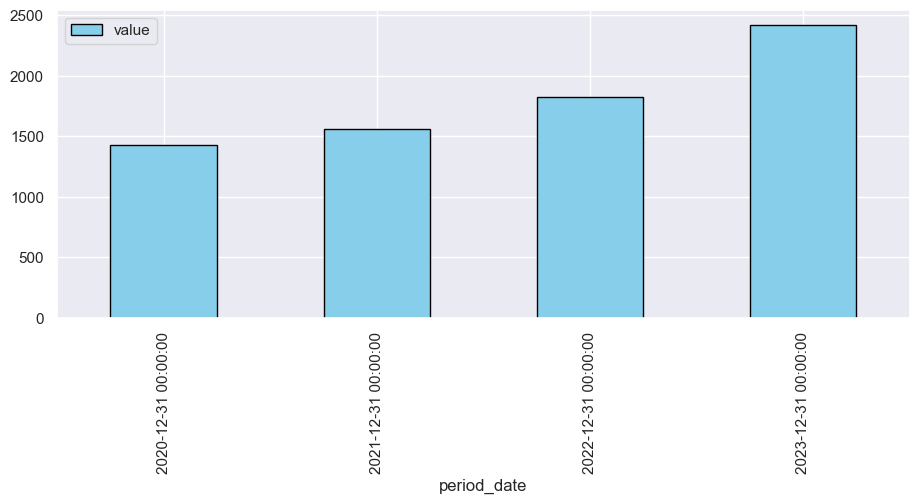

In [35]:
data_annual_mean.plot(kind='bar',color= 'skyblue',edgecolor='black')
ax.set_ylabel('Yearly Inflation Rate');

In [16]:
# Calculate inflation rate
# Replace 'df1' with your actual DataFrame name
inflation_rate = [(data_annual_mean['value'][i] - data_annual_mean['value'][i-1]) / data_annual_mean['value'][i-1] for i in range(1, len(data_annual_mean))]

In [17]:
inflation_rate

[0.08785486334670059, 0.17006153055053216, 0.32858862054452814]

In [18]:
pd2 = pd.read_csv('inflation.csv')

In [42]:
pd2

,Year,Inflation_rate
0,2019,0.15801
1,2020,0.23601
2,2021,0.08785
3,2022,0.17006
4,2023,0.32859
5,2024,0.29401


In [19]:
# rate 0.1581 is from 1 so  inflation rate %
pd2['% Inflation'] = (pd2['Inflation_rate']) * 100

In [45]:
pd2

,Year,Inflation_rate,% Inflation
0,2019,0.15801,15.801
1,2020,0.23601,23.601
2,2021,0.08785,8.785
3,2022,0.17006,17.006
4,2023,0.32859,32.859
5,2024,0.29401,29.401


In [20]:
pd2 = pd2.set_index('Year   ')
pd2.head(5)

,Inflation_rate,% Inflation
Year,,
2019,0.15801,15.801
2020,0.23601,23.601
2021,0.08785,8.785
2022,0.17006,17.006
2023,0.32859,32.859


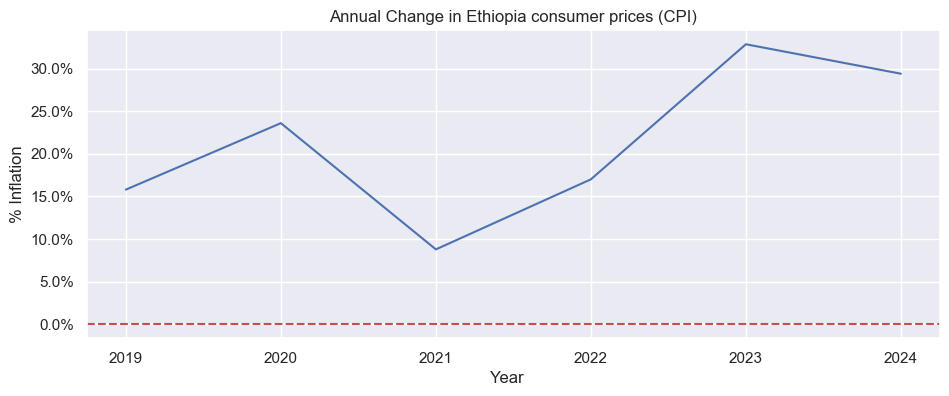

In [24]:
# Plotting the data
fig, ax = plt.subplots()
pd2['% Inflation'].plot()
# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100.0))
ax.set_ylabel('% Inflation')
ax.set_title('Annual Change in Ethiopia consumer prices (CPI)')

# Adding a horizontal line at y=3 for reference
ax.axhline(y=0, color='r', linestyle='--')
plt.show()

In [80]:
df.head(5)

,country,market,admin_1,longitude,latitude,cpcv2,product,source_document,price_type,product_source,unit,unit_type,currency,value,Year,Month,Weekday Name
period_date,,,,,,,,,,,,,,,,,
2020-01-01,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,R01701BD,Beans (Haricot),Famine Early Warning Systems Network (FEWS NET...,Retail,Local,kg,Weight,ETB,41.00,2020,1,Wednesday
2020-01-01,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,S8AA,"Casual Labor (unskilled, daily, without food)",Famine Early Warning Systems Network (FEWS NET...,Wage,Local,day,Item,ETB,54.00,2020,1,Wednesday
2020-01-01,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,P33360AA,Diesel,Famine Early Warning Systems Network (FEWS NET...,Retail,Import,L,Volume,ETB,18.75,2020,1,Wednesday
2020-01-01,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,P03130AA,Firewood,Famine Early Warning Systems Network (FEWS NET...,Retail,Local,kg,Weight,ETB,5.52,2020,1,Wednesday
2020-01-01,Ethiopia,"Addis Ababa, Merkato",Addis Ababa,38.766701,9.03333,P33310AA,Gasoline,Famine Early Warning Systems Network (FEWS NET...,Retail,Import,L,Volume,ETB,18.75,2020,1,Wednesday


In [25]:
# Select rows of energy source
Diesel = df[df['product'] == 'Diesel']
Firewood = df[df['product'] == 'Firewood']
Gasoline = df[df['product'] == 'Gasoline']
period_date = df[df['product'] == 'period_date']

In [26]:
Energy_source = pd.concat([Diesel, Firewood, Gasoline, period_date], keys=['Diesel', 'Firewood', 'Gasoline', 'period_date'])

In [27]:
Energy_source

country                market      admin_1  longitude  \
         period_date                                                           
Diesel   2020-01-01   Ethiopia  Addis Ababa, Merkato  Addis Ababa  38.766701   
         2020-01-01   Ethiopia             Bahir Dar       Amhara  37.366669   
         2020-01-01   Ethiopia              Beddenno       Oromia  41.592899   
         2020-01-01   Ethiopia               Chereti       Somali  41.882500   
         2020-01-01   Ethiopia            Degehabour       Somali  43.565399   
...                        ...                   ...          ...        ...   
Gasoline 2023-06-21   Ethiopia                 Shire       Tigray  38.169998   
         2023-06-21   Ethiopia                Sikela        SNNPR  37.558498   
         2023-06-21   Ethiopia                  Sodo        SNNPR  37.761002   
         2023-06-21   Ethiopia                Warder       Somali  45.341801   
         2023-06-21   Ethiopia                Yabelo       Oromia  38.093399   

                      latitude     cpcv2   product  \
         period_date                                 
Diesel   2020-01-01    9.03333  P33360AA    Diesel   
         2020-01-01   11.60000  P33360AA    Diesel   
         2020-01-01    9.02344  P33360AA    Diesel   
         2020-01-01    5.33751  P33360AA    Diesel   
         2020-01-01    8.22308  P33360AA    Diesel   
...                        ...       ...       ...   
Gasoline 2023-06-21   14.06050  P33310AA  Gasoline   
         2023-06-21    6.03618  P33310AA  Gasoline   
         2023-06-21    6.86405  P33310AA  Gasoline   
         2023-06-21    6.97346  P33310AA  Gasoline   
         2023-06-21    4.89343  P33310AA  Gasoline   

                                                        source_document  \
         period_date                                                      
Diesel   2020-01-01   Famine Early Warning Systems Network (FEWS NET...   
         2020-01-01   Famine Early Warning Systems Network (FEWS NET...   
         2020-01-01   Famine Early Warning Systems Network (FEWS NET...   
         2020-01-01   Famine Early Warning Systems Network (FEWS NET...   
         2020-01-01   Famine Early Warning Systems Network (FEWS NET...   
...                                                                 ...   
Gasoline 2023-06-21   Famine Early Warning Systems Network (FEWS NET...   
         2023-06-21   Famine Early Warning Systems Network (FEWS NET...   
         2023-06-21   Famine Early Warning Systems Network (FEWS NET...   
         2023-06-21   Famine Early Warning Systems Network (FEWS NET...   
         2023-06-21   Famine Early Warning Systems Network (FEWS NET...   

                     price_type product_source unit unit_type currency  \
         period_date                                                     
Diesel   2020-01-01      Retail         Import    L    Volume      ETB   
         2020-01-01      Retail         Import    L    Volume      ETB   
         2020-01-01      Retail         Import    L    Volume      ETB   
         2020-01-01      Retail         Import    L    Volume      ETB   
         2020-01-01      Retail         Import    L    Volume      ETB   
...                         ...            ...  ...       ...      ...   
Gasoline 2023-06-21      Retail         Import    L    Volume      ETB   
         2023-06-21      Retail         Import    L    Volume      ETB   
         2023-06-21      Retail         Import    L    Volume      ETB   
         2023-06-21      Retail         Import    L    Volume      ETB   
         2023-06-21      Retail         Import    L    Volume      ETB   

                           value  Year  Month Weekday Name  
         period_date                                        
Diesel   2020-01-01    18.750000  2020      1    Wednesday  
         2020-01-01    18.760000  2020      1    Wednesday  
         2020-01-01    20.400000  2020      1    Wednesday  
         2020-01-01    25.000000  2

In [34]:
Energy_source(Energy_source['value']).plot();

TypeError: 'DataFrame' object is not callable

In [32]:
Energy_source = Energy_source.set_index('period_date')
Energy_source.head(5)

KeyError: "None of ['period_date'] are in the columns"